Poetry Generator

In [65]:
import numpy as np
import string

In [66]:
np.random.seed(4)

In [67]:
initial = {} #start of a phrase
first_order = {} #second word only
second_order = {}

In [68]:
def remove_punc(s):
    return s.translate(str.maketrans('', '', string.punctuation))

In [69]:
from urllib.request import urlopen
rf_data_link = "https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/hmm_class/robert_frost.txt"

rf = urlopen(rf_data_link).read().decode('utf-8')

In [70]:
#string to text and save it to data folder
with open('data/rf.txt', 'w', encoding='utf-8') as f:
    f.write(rf)

In [71]:
def add_to_dict(d, k, v):
    if k not in d:
        d[k] = []
    d[k].append(v)

In [72]:
for line in open('data/rf.txt'):
    tokens = remove_punc(line).lower().split()
    T = len(tokens)
    for i in range(T):
        t = tokens[i]
        if i == 0:
            initial[t] = initial.get(t, 0) + 1
        else:
            t_1 = tokens[i-1]
            if i == 1:
                add_to_dict(first_order, t_1, t)
            else:
                t_2 = tokens[i-2]
                add_to_dict(second_order, (t_2, t_1), t)
                

In [73]:
#normalize the distributions
initial_total = sum(initial.values())
for t, c in initial.items():
    initial[t] = c / initial_total

In [74]:
 #convert lists to probability distributions
 #[cat, cat, dog, dog, mouse, ...] -> {cat: 0.5, dog: 0.4, mouse: 0.1}
 
def list_to_pdict(ts):
     #turn each list of possibilities into a dictionary of probabilities
     d = {}
     n = len(ts)
     for t in ts:
        d[t] = d.get(t, 0.) + 1
     for t,c in d.items():
        d[t] = c / n
     return d
        

In [75]:
for t_1, ts in first_order.items():
    #replace the list with a dictionary of probabilities
    first_order[t_1] = list_to_pdict(ts)

In [76]:
for k, ts in second_order.items():
    second_order[k] = list_to_pdict(ts)

In [95]:
def sample_word(d):
    #print("d:", d)
    p0 = np.random.random()
    #print("p0:", p0)
    cumulative = 0
    for t, p in d.items():
        cumulative += p
        if p0 < cumulative:
            return t
    assert(False) #should never get there #sanity check

In [96]:
def generate():
    for i in range(5): #generate 5 lines
        sentence = []
        
        #initial word
        w0 = sample_word(initial)
        sentence.append(w0)
        
        #sample second word
        w1 = sample_word(first_order[w0])   
        sentence.append(w1)

        #sample the rest of the words
        while True:
            w2 = sample_word(second_order[(w0, w1)])
            if w2 == 'END':
                break
            sentence.append(w2)
            w0, w1 = w1, w2
        print(" ".join(sentence))
                

In [98]:
#generate() #fix it later

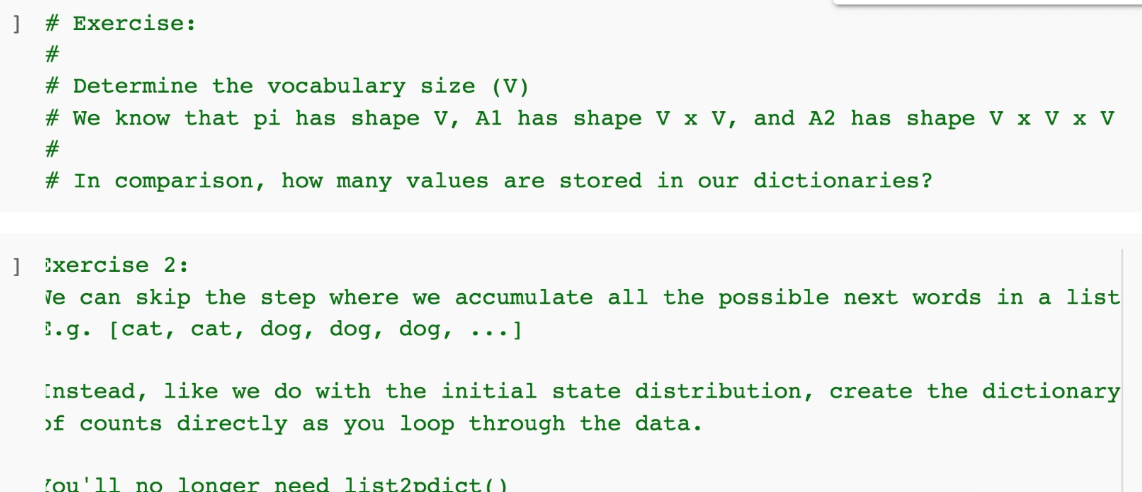

In [99]:
#load an image 
from IPython.display import Image
img_path = "images/exerc.png"

Image(filename=img_path)